In [52]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as m

import scipy as sc
from scipy import stats
from scipy.stats import t as t 
import scipy.optimize as sco
from scipy.optimize import curve_fit
import scipy.constants as scc
from scipy.stats import poisson

import uncertainties as un
import uncertainties.unumpy as unp

In [53]:
#Reading data

Ohr = np.array(pd.read_csv("data/OH.txt", delimiter = ","))
Fe  = np.array(pd.read_csv("data/Fe.txt", delimiter = ","))

OH_spec = pd.read_csv("data/OH_in.txt", delimiter = "\t")
Fe_spec = pd.read_csv("data/Fe_in.dat", delimiter = "  ")

/tmp/ipykernel_1423/2604687589.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Fe_spec = pd.read_csv("data/Fe_in.dat", delimiter = "  ")


In [54]:
# Constants and values

Bv = 1696.6

In [55]:
#Canculation of OH

Int = Ohr[:,0]
N = Ohr[:,1]
lam = Ohr[:,2]
S = Ohr[:,3]

ny = 2*np.pi*10**9/lam
igb = np.array([])
for i in range(len(Int)):
    igb = np.append(igb, m.log(Int[i]/(ny[i]*S[i])))

#%%
def fitf(x,a,b):
    y = a*x+b
    return y

coef,cov = sco.curve_fit(fitf, N*(N+1), igb)
cov = np.sqrt(np.diag(cov))


smer = un.ufloat(coef[0],cov[0] )
print(smer)

T = -scc.c* scc.h*Bv/(scc.k* smer)
print("T = ", T, "K")

print("A = ", coef[0], "±", cov[0])
print("B = ", coef[1], "±", cov[1])

-0.091+/-0.004
T =  269+/-11 K
A =  -0.09077804789726018 ± 0.0035968665477678487
B =  -5.47138398602787 ± 0.0896190172079279


In [56]:
#Canculation of Fe

lamz = Fe[:,1]
intz = Fe[:,0]
Em = Fe[:,2]
A = Fe[:,3]

gi = np.array([])
for i in range(len(intz)):
    gi = np.append(gi, np.log(intz[i]*lamz[i]/A[i]))
                   
print(gi)

#%%
coef1,cov1 = sco.curve_fit(fitf, Em, gi)
cov1 = np.sqrt(np.diag(cov1))

fit_values = fitf(Em, coef1[0], coef1[1])

smer2 = un.ufloat(coef1[0], cov1[0])
print(scc.k)
T2 = -scc.electron_volt/(scc.k*smer2)
print("T = ", T2)


print("A = ", coef1[0], "±", cov1[0])
print("B = ", coef1[1], "±", cov1[1])

[15.62902249 13.99186893 14.61301146 14.47377212 14.63992472 16.0440567
 14.43122607 13.20652829 19.02026663 14.65736783 14.87001268 14.85604309
 18.86641271 14.79395933 14.33622035 14.61934292 13.12800624 13.21096547
 19.98996195 14.6992539  14.88840232]
1.380649e-23
T =  (5.6+/-0.4)e+03
A =  -2.06214382341946 ± 0.15470831674242888
B =  24.686386411651505 ± 0.7242391226465691


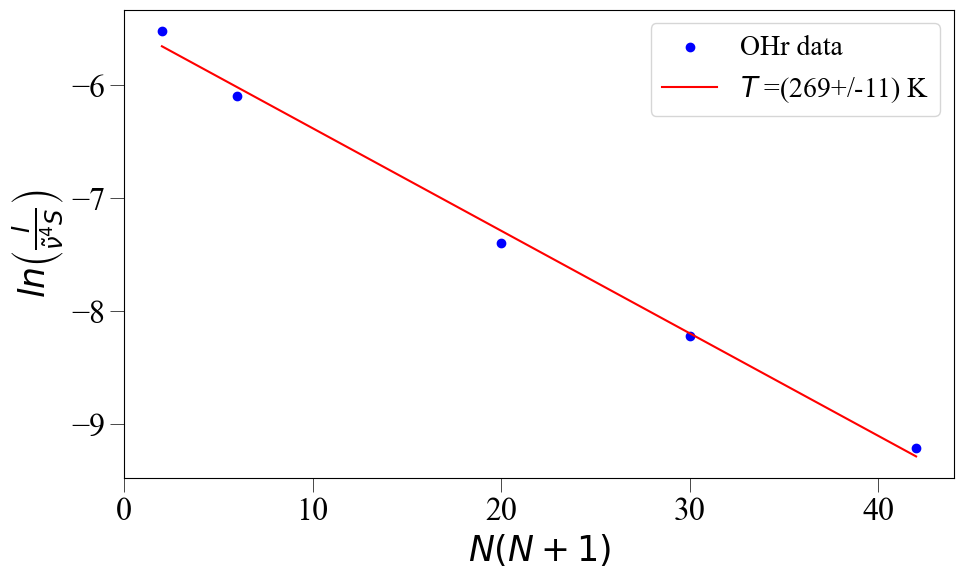

In [57]:
# Plot of OH

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  
plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"

# Define the font size
ax_l_size = 25
l_size = 23

fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$N(N+1)$")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$ln\left(\frac{I}{\tilde{\nu}^4 S}\right)$")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(N*(N+1), igb, color='blue', label='OHr data')
ax.plot(N*(N+1), coef[0]*N*(N+1) + coef[1], color='red', label=r'$T$ =' + f'({T})' + r' K')

ax.legend(loc='upper right', fontsize=20)

plt.show() 

fig.savefig('images/OH.png', bbox_inches='tight')

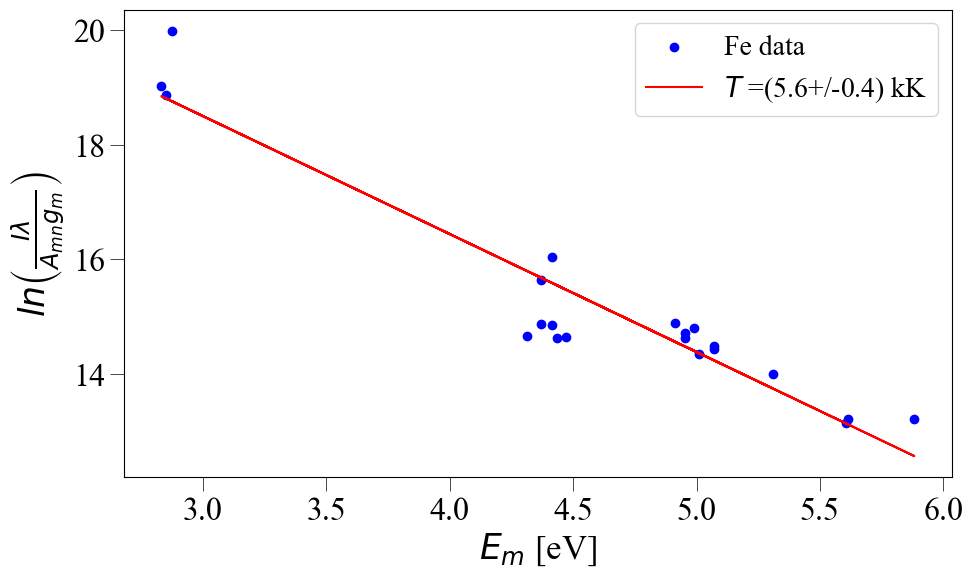

In [58]:
# Plot of Fe

fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$E_m$ [eV]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$ln\left(\frac{I \lambda}{A_{mn}g_{m}}\right)$")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(Em, gi, color='blue', label='Fe data')
ax.plot(Em, fit_values, color='red', label=r'$T$ =' + f'({T2*10**(-3)})' + r' kK')

ax.legend(loc='upper right', fontsize=20)

plt.show() 

fig.savefig('images/Fe.png', bbox_inches='tight')

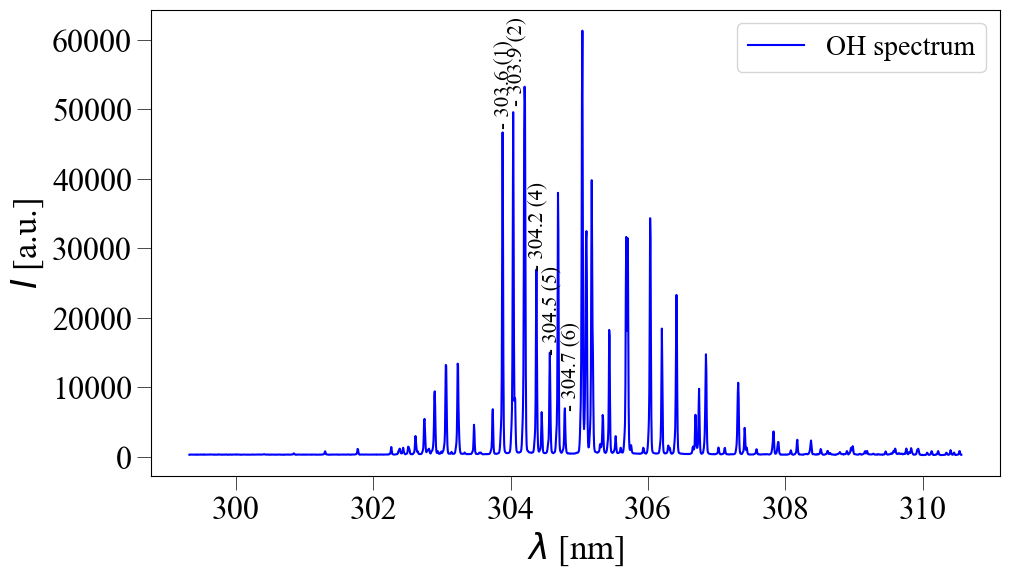

In [59]:
# Plot of OH spectrum

fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$\lambda$ [nm]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$I$ [a.u.]")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.plot(OH_spec['lam'], OH_spec['int'], color='blue', label='OH spectrum')

ax.text(303.75, 48000, '- 303.6 (1)', fontsize=15, rotation=90)
ax.text(303.94, 51200, '- 303.9 (2)', fontsize=15, rotation=90)
ax.text(304.24, 27500, '- 304.2 (4)', fontsize=15, rotation=90)
ax.text(304.45, 15400, '- 304.5 (5)', fontsize=15, rotation=90)
ax.text(304.73, 7400, '- 304.7 (6)', fontsize=15, rotation=90)

ax.legend(loc='upper right', fontsize=20)

plt.show() 

fig.savefig('images/OH_spec.png', bbox_inches='tight')

In [60]:
lamz[1]

429.9235

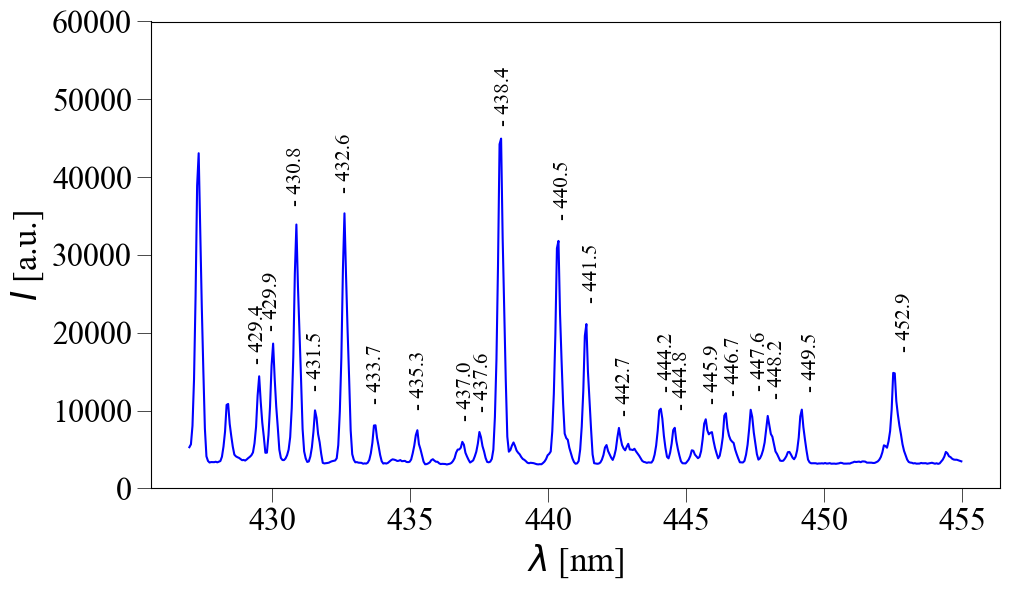

In [61]:
# Plot of Fe spectrum

fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$\lambda$ [nm]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$I$ [a.u.]")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  
ax.set_ylim(0, 60000)

# ax.scatter(Em, gi, color='blue', label='OHr data')
ax.plot(Fe_spec['lam'], Fe_spec['int'], color='blue', label='Fe spectrum')


for ii,ID in enumerate(intz):
    ax.text(lamz[ii]-0.3, intz[ii]+6500, f'- {lamz[ii]:.1f}', fontsize=15, rotation=90)

# ax.legend(loc='upper right', fontsize=20)

plt.show() 

fig.savefig('images/Fe_spec.png', bbox_inches='tight')

In [62]:
Ohr_proc = pd.read_csv("data/OH.txt", delimiter = ",")
Fe_proc  = pd.read_csv("data/Fe.txt", delimiter = ",")

Ohr_proc['ln'] = igb
Fe_proc['ln'] = gi

In [63]:
Ohr_proc = Ohr_proc.round(2)
Fe_proc = Fe_proc.round(2)

Ohr_proc.to_csv('data/Ohr_proc.csv', index=False)
Fe_proc.to_csv('data/Fe_proc.csv', index=False)

In [64]:
Ohr_proc

,Int,N,lam,S,J,ln
0,46224.51,1,307.84,0.56,3/2,-5.52
1,49052.06,2,308.00,1.06,5/2,-6.09
2,26258.67,4,308.33,2.10,9/2,-7.40
3,14480.75,5,308.52,2.64,11/2,-8.22
4,6434.58,6,308.73,3.16,13/2,-9.21
